*  AUTHOR: EWA STANLEY CHIDOZIE
*  PROJECT: BREAST CANCER DETECTION USING CUSTOM SEQUENTIAL MODEL
*  TECHNOLOGIES: PYTHON PROGRAMMING LANGUAGE AND RELEVANT LIBRARIES, JUPYTER    
   NOTEBOOK
*  DATE: 13/04/2025














In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING NECESSARY LIBRARIES

In [ ]:
import tensorflow as tf
import logging
import numpy as np
# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

tf.config.list_physical_devices('GPU')
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
tf.test.is_built_with_cuda()

True

LOADING IMAGES FROM LOCAL DIRECTORY

In [ ]:
#Declaring image path
path = '/content/drive/MyDrive/Colab Notebooks/Original Dataset'

#SPLITING IMAGES FOR TRAINING AND VALIDATION RATIO (70:30)
train = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset= 'training',
    seed = 123,
    image_size=(180,180),
    batch_size=32)

val = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset= 'validation',
    seed = 123,
    image_size=(180,180),
    batch_size=32)

Found 745 files belonging to 2 classes.
Using 596 files for training.
Found 745 files belonging to 2 classes.
Using 149 files for validation.


In [ ]:
# LABELS FOR PREDICITON
class_names = train.class_names
print(class_names)

['Cancer', 'Non-Cancer']


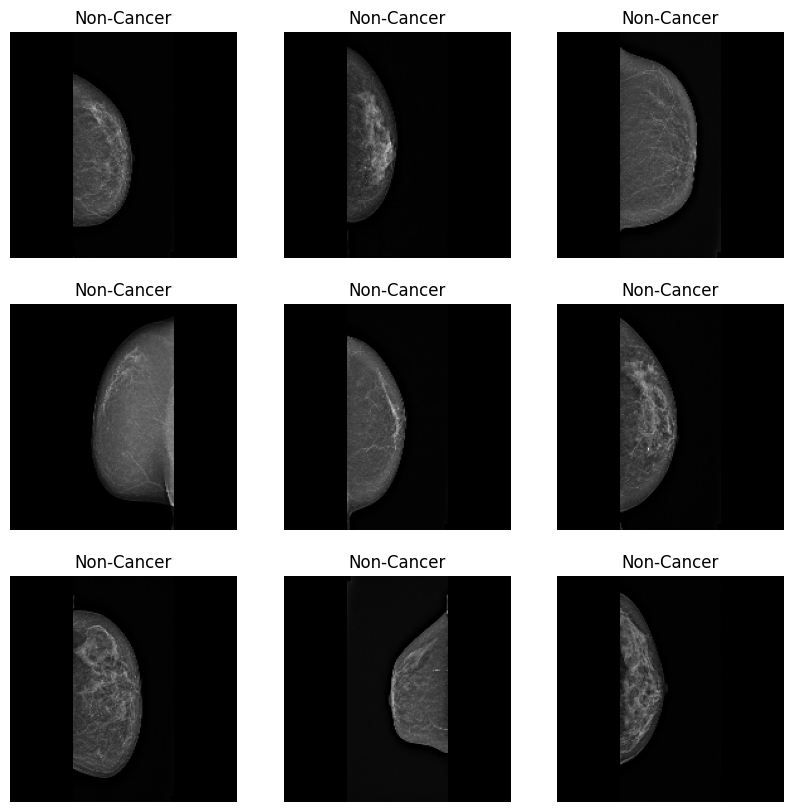

In [ ]:
#VISUALIZATION OF TRAINABLE IMAGES
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# IMAGE AND LABEL SHAPES
for img_batch, label_batch  in train:
    print(img_batch.shape)
    print(label_batch.shape)
    break

(32, 180, 180, 3)
(32,)


MODEL BUILDING AND IMAGE PREPROCESSING

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(180,180,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Softmax()
    ])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 97200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 97200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,441,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,441,986 (47.46 MB)

 Trainable params: 12,441,986 (47.46 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate =0.001)
metrics = ["accuracy"]

model.compile(loss =loss, optimizer = opt, metrics=metrics)
history = model.fit(train, batch_size=32, epochs= 10, validation_data= val, verbose=2)

Epoch 1/10
19/19 - 30s - 2s/step - accuracy: 0.8003 - loss: 1.5312 - val_accuracy: 0.8859 - val_loss: 0.2697
Epoch 2/10
19/19 - 16s - 848ms/step - accuracy: 0.9128 - loss: 0.3228 - val_accuracy: 0.9060 - val_loss: 0.2312
Epoch 3/10
19/19 - 21s - 1s/step - accuracy: 0.9211 - loss: 0.2444 - val_accuracy: 0.9530 - val_loss: 0.1753
Epoch 4/10
19/19 - 21s - 1s/step - accuracy: 0.9430 - loss: 0.1926 - val_accuracy: 0.9329 - val_loss: 0.1710
Epoch 5/10
19/19 - 20s - 1s/step - accuracy: 0.9295 - loss: 0.1995 - val_accuracy: 0.9262 - val_loss: 0.2227
Epoch 6/10
19/19 - 21s - 1s/step - accuracy: 0.9228 - loss: 0.3062 - val_accuracy: 0.9262 - val_loss: 0.3728
Epoch 7/10
19/19 - 26s - 1s/step - accuracy: 0.9295 - loss: 0.2154 - val_accuracy: 0.9262 - val_loss: 0.2346
Epoch 8/10
19/19 - 35s - 2s/step - accuracy: 0.9530 - loss: 0.1346 - val_accuracy: 0.9396 - val_loss: 0.1815
Epoch 9/10
19/19 - 20s - 1s/step - accuracy: 0.9648 - loss: 0.0911 - val_accuracy: 0.9396 - val_loss: 0.1450
Epoch 10/10
19/1

In [ ]:
model.evaluate(train) #FINAL ACCURACY AFTER TRAINING

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.9809 - loss: 0.0694


[0.06611774116754532, 0.9798657894134521]

In [ ]:
model.evaluate(val) #FINAL ACCURACY AFTER TESTING

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - accuracy: 0.9356 - loss: 0.1367


[0.14659367501735687, 0.9395973086357117]

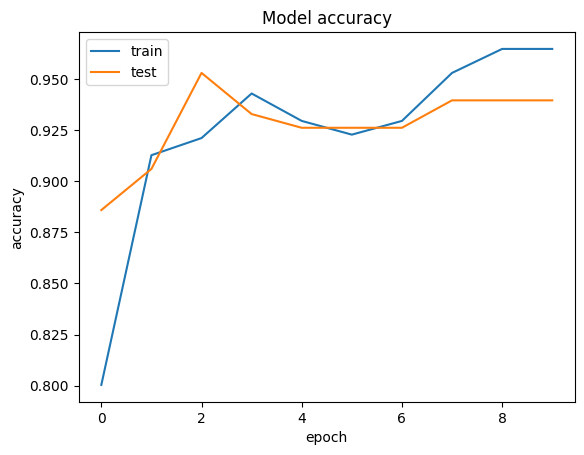

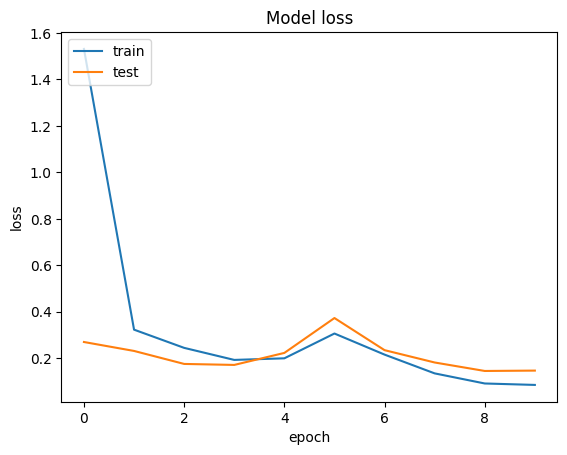

In [ ]:
#MODEL ACCURACY AND LOSS PLOTS

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import cv2
def predict_image(img):
  img_4d=cv2.resize(img, dsize = (180,180), interpolation=cv2.INTER_CUBIC)
  img_4d=np.expand_dims(img_4d, axis=0)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
import gradio as gr
image = gr.Image(width=180, height=180)
label = gr.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://41c84fc1d8078e03bd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://41c84fc1d8078e03bd.gradio.live
